In [1]:
# Imports for data analysis
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from datetime import datetime
import seaborn as sns
from pprint import pprint
import hvplot.pandas
from config import geo_api


In [2]:
# read csv
df_ppl_involved = pd.read_csv("../Resources/People_Involved.csv", index_col=0)
df_ppl_involved = df_ppl_involved.sort_values(by = "Case Date")


# some data are from 2017, so we need to remove it 
df_ppl_involved = df_ppl_involved[df_ppl_involved["Case Date"].apply(lambda x : datetime.strptime(x, "%Y-%m-%d").strftime("%Y")) != "2017"]
df_ppl_involved = df_ppl_involved.reset_index(drop= True)


df_ppl_involved.head()

,St Case Num,Age,Sex,Race,Seat Pos,AirBag Deployed,Is Fatal,Is Drug,Is Drunk,BAC,Case Date,Make Name,Model Name,Model Year,State,County
0,80002,26,2,White,"Front Seat, Left Side",True,True,No (drugs not involved),Yes (Alcohol Involved),Test Not Given,2018-01-01,Volkswagen,Volkswagen Eos,2007,Colorado,LARIMER (69)
1,370096,23,1,White,"Front Seat, Left Side",True,True,Reported as Unknown,Reported as Unknown,0.250 % BAC,2018-01-01,Volvo,Volvo 60 Series,2006,North Carolina,WAKE (183)
2,370079,25,1,Not a Fatality (not Applicable),"Front Seat, Left Side",True,False,No (drugs not involved),Yes (Alcohol Involved),0.100 % BAC,2018-01-01,Chevrolet,"Chevrolet C, K, R, V-series pickup/Silverado",2004,North Carolina,NEW HANOVER (129)
3,60037,20,2,Not a Fatality (not Applicable),"Front Seat, Right Side",False,False,Not Reported,Not Reported,Test Not Given,2018-01-01,Ford,Ford F-Series pickup,2001,California,RIVERSIDE (65)
4,60672,83,1,Not a Fatality (not Applicable),"Front Seat, Left Side",False,False,Reported as Unknown,Reported as Unknown,Test Not Given,2018-01-01,Oldsmobile,Oldsmobile Delta 88/LSS,1994,California,FRESNO (19)


In [3]:
#check length of csv
len(df_ppl_involved)

188227

In [4]:
df_ppl_involved["Case Year"] = df_ppl_involved["Case Date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').strftime("%Y"))
df_ppl_involved.head()

,St Case Num,Age,Sex,Race,Seat Pos,AirBag Deployed,Is Fatal,Is Drug,Is Drunk,BAC,Case Date,Make Name,Model Name,Model Year,State,County,Case Year
0,80002,26,2,White,"Front Seat, Left Side",True,True,No (drugs not involved),Yes (Alcohol Involved),Test Not Given,2018-01-01,Volkswagen,Volkswagen Eos,2007,Colorado,LARIMER (69),2018
1,370096,23,1,White,"Front Seat, Left Side",True,True,Reported as Unknown,Reported as Unknown,0.250 % BAC,2018-01-01,Volvo,Volvo 60 Series,2006,North Carolina,WAKE (183),2018
2,370079,25,1,Not a Fatality (not Applicable),"Front Seat, Left Side",True,False,No (drugs not involved),Yes (Alcohol Involved),0.100 % BAC,2018-01-01,Chevrolet,"Chevrolet C, K, R, V-series pickup/Silverado",2004,North Carolina,NEW HANOVER (129),2018
3,60037,20,2,Not a Fatality (not Applicable),"Front Seat, Right Side",False,False,Not Reported,Not Reported,Test Not Given,2018-01-01,Ford,Ford F-Series pickup,2001,California,RIVERSIDE (65),2018
4,60672,83,1,Not a Fatality (not Applicable),"Front Seat, Left Side",False,False,Reported as Unknown,Reported as Unknown,Test Not Given,2018-01-01,Oldsmobile,Oldsmobile Delta 88/LSS,1994,California,FRESNO (19),2018


In [5]:
print(len(df_ppl_involved.groupby(["Case Year", "St Case Num", "State"])))

133297


<h1>1. Gender Analysis</h1>

In [6]:
#checking values
df_ppl_involved["Sex"].value_counts()

Sex
1    125598
2     57732
9      3378
8      1519
Name: count, dtype: int64

In [7]:
# remove the unknown and weird numbers
df_ppl_involved = df_ppl_involved[(df_ppl_involved["Sex"] == 1) | (df_ppl_involved["Sex"] == 2)]

#convert sex names to actual names, male = 1, female = 2
df_ppl_involved.loc[:, "Sex"] = df_ppl_involved["Sex"].replace({1: "Male", 2: "Female"})
df_ppl_involved.head()

,St Case Num,Age,Sex,Race,Seat Pos,AirBag Deployed,Is Fatal,Is Drug,Is Drunk,BAC,Case Date,Make Name,Model Name,Model Year,State,County,Case Year
0,80002,26,Female,White,"Front Seat, Left Side",True,True,No (drugs not involved),Yes (Alcohol Involved),Test Not Given,2018-01-01,Volkswagen,Volkswagen Eos,2007,Colorado,LARIMER (69),2018
1,370096,23,Male,White,"Front Seat, Left Side",True,True,Reported as Unknown,Reported as Unknown,0.250 % BAC,2018-01-01,Volvo,Volvo 60 Series,2006,North Carolina,WAKE (183),2018
2,370079,25,Male,Not a Fatality (not Applicable),"Front Seat, Left Side",True,False,No (drugs not involved),Yes (Alcohol Involved),0.100 % BAC,2018-01-01,Chevrolet,"Chevrolet C, K, R, V-series pickup/Silverado",2004,North Carolina,NEW HANOVER (129),2018
3,60037,20,Female,Not a Fatality (not Applicable),"Front Seat, Right Side",False,False,Not Reported,Not Reported,Test Not Given,2018-01-01,Ford,Ford F-Series pickup,2001,California,RIVERSIDE (65),2018
4,60672,83,Male,Not a Fatality (not Applicable),"Front Seat, Left Side",False,False,Reported as Unknown,Reported as Unknown,Test Not Given,2018-01-01,Oldsmobile,Oldsmobile Delta 88/LSS,1994,California,FRESNO (19),2018


<h3>1a. Fatality Pie Chart by Sex</h3>

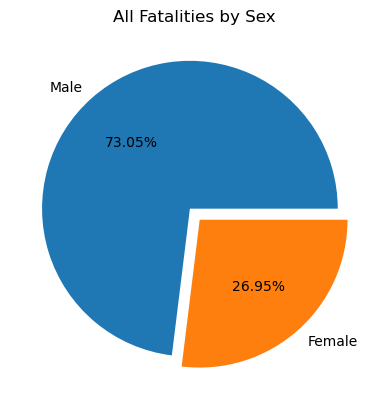

In [8]:
#Get the number of fatal cases of males and females 
num_fatal_male = len(df_ppl_involved[(df_ppl_involved["Sex"] == "Male") & (df_ppl_involved["Is Fatal"] == True)])
num_fatal_female = len(df_ppl_involved[(df_ppl_involved["Sex"] == "Female") & (df_ppl_involved["Is Fatal"] == True)])

labels = ["Male", "Female"]
values = [num_fatal_male, num_fatal_female]
explode = [0.05, 0.05]

plt.pie(values, labels=labels, autopct="%.2f%%", explode= explode)
plt.title("All Fatalities by Sex")
plt.show()

<h3>1b. Fatality Rate Per Sex Category</h3>

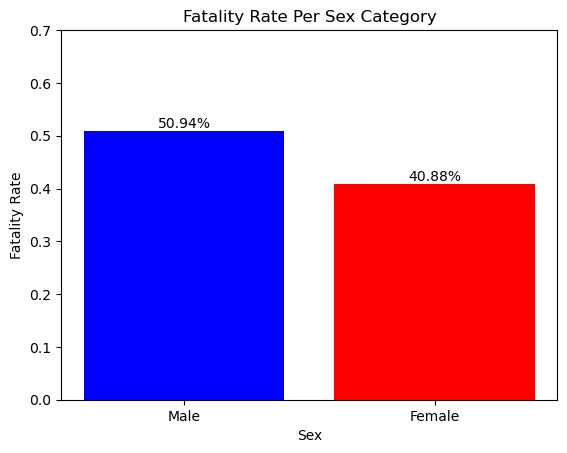

In [9]:
# Total number of female and male
num_female = len(df_ppl_involved[df_ppl_involved["Sex"]== "Female"])
num_male = len(df_ppl_involved[df_ppl_involved["Sex"] == "Male"])

# Male and female fatality rates
fatality_rate_male = num_fatal_male/num_male
fatality_rate_female = num_fatal_female/num_female

# labels for bar graph
x_labels = ["Male", "Female"]
fatality_rates = [fatality_rate_male, fatality_rate_female]

#plot the graphs
plt.bar(x_labels, fatality_rates, color = ["Blue", "Red"])
plt.title("Fatality Rate Per Sex Category")
plt.ylabel("Fatality Rate")
plt.xlabel("Sex")
plt.ylim(0, .7)
# add percent labels
for idx, data in enumerate(fatality_rates):
    plt.text(idx, data, f'{data*100:.2f}%', ha = "center", va = "bottom")

plt.show()


In [10]:
#Check Race Values
print(df_ppl_involved["Race"].value_counts())
df_ppl_involved["Race"].isna().sum()

Race
Not a Fatality (not Applicable)                                                                   23485
White                                                                                             15699
Black                                                                                              3106
Unknown                                                                                             760
American Indian (includes Alaska Native)                                                            336
All other races                                                                                     278
Other Asian or Pacific Islander                                                                      85
Asian Indian                                                                                         75
Filipino                                                                                             57
Multiple Races (individual races not specified; ex. "mixed"

139159

A lot of the races are NaN. Not useful data.

<h1>2. SEAT POSITION ANALYSIS </h1>


In [11]:
#checking values 
df_ppl_involved["Seat Pos"].value_counts()

#only keeps the ones that have a lot of data
df_seat_pos = df_ppl_involved[(df_ppl_involved["Seat Pos"] == "Front Seat, Left Side")|
                        (df_ppl_involved["Seat Pos"] == "Front Seat, Right Side")|
                        (df_ppl_involved["Seat Pos"] == "Second Seat, Left Side")|
                        (df_ppl_involved["Seat Pos"] == "Second Seat, Right Side")|
                        (df_ppl_involved["Seat Pos"] == "Second Seat, Middle")
                       ][["Seat Pos","Is Fatal"]].copy()
df_seat_pos.head()

,Seat Pos,Is Fatal
0,"Front Seat, Left Side",True
1,"Front Seat, Left Side",True
2,"Front Seat, Left Side",False
3,"Front Seat, Right Side",False
4,"Front Seat, Left Side",False


<h3> 2a. Fatality vs. Seat Position </h3>

<h4>Stacked Bar Graph Fatal/Non-fatal and Seat Position</h4>

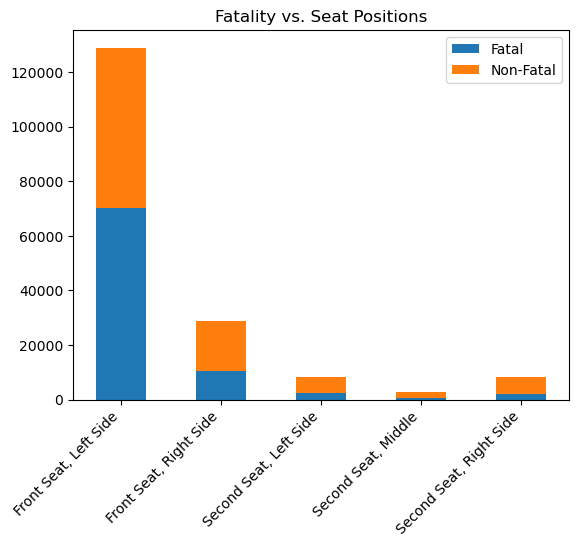

In [12]:
#x labels for bar plot
x_labels = df_seat_pos["Seat Pos"].unique()
x_labels.sort()

#get the counts of fatal and non fatal for each seat position
y_data = {
    "Fatal": [len(df_seat_pos[(df_seat_pos["Seat Pos"] == pos) & (df_seat_pos["Is Fatal"] == True)]) for pos in x_labels],
    "Non-Fatal": [len(df_seat_pos[(df_seat_pos["Seat Pos"] == pos) & (df_seat_pos["Is Fatal"] == False)]) for pos in x_labels]
}

width = 0.5
fig, ax = plt.subplots()
bottom = np.zeros(5)

for boolean, counts in y_data.items():
    ax.bar(x_labels, counts, width, label = boolean, bottom = bottom)
    bottom += counts

plt.xticks(rotation = 45, ha='right')
plt.title("Fatality vs. Seat Positions")
plt.legend(loc = "upper right")
plt.show()


<h4>Pie Chart Comparing Proportions of Fatality For Each Seat Position</h4>

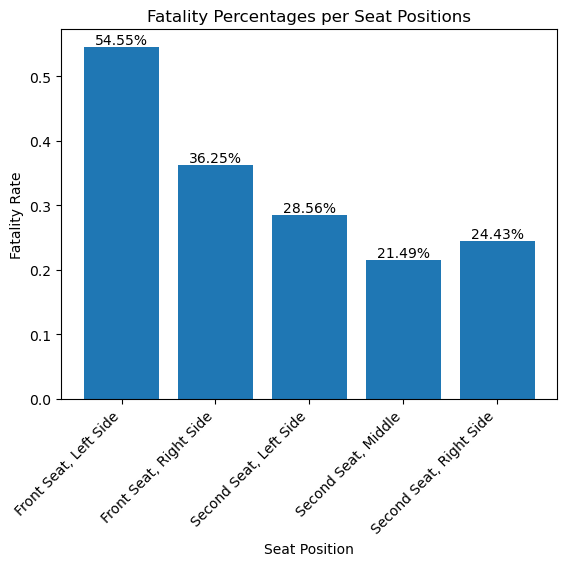

In [13]:
#xlabels for pie chart
x_labels = df_seat_pos["Seat Pos"].unique()
x_labels.sort()

#get the counts of fatal for each seat position and the total
fatals = [len(df_seat_pos[(df_seat_pos["Seat Pos"] == pos) & (df_seat_pos["Is Fatal"] == True)]) for pos in x_labels]
totals = [len(df_seat_pos[df_seat_pos["Seat Pos"] == pos]) for pos in x_labels]

#get the fatality proportions for each seat positions
fatal_proportions = [fatal/total for fatal, total in zip(fatals, totals)]

#plot the chart
plt.bar(x_labels, fatal_proportions)
plt.title("Fatality Percentages per Seat Positions")
plt.xticks(x_labels, rotation = 45, ha = "right")
plt.xlabel("Seat Position")
plt.ylabel("Fatality Rate")

# Add labels on bars
for i, value in enumerate(fatal_proportions):
    plt.text(i, value, f'{value*100:.2f}%', ha='center',va='bottom')

plt.show()



<h3>2b. Chisquare Test of Homogeneity for Proportions</h3>

In [14]:
# Here, we want to see if the proportion of survival/fatality rates are the same.
# Null hypothesis: The Fatality rate is the same across the different seat positions
# Alternate Hypothesis: The Fatality rate is different across the different seat positions

observed = [
    y_data["Fatal"],
    y_data["Non-Fatal"]
]

results = st.chi2_contingency(observed)
print(f"The expected value table is: ", results.expected_freq)
print(f"The p value is: ", results.pvalue)

# plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
# sns.heatmap(observed, annot=True, cmap="YlGnBu", fmt="d")  # d for integer formatting in annotations
# plt.title("Contingency Table Heatmap")
# plt.xlabel("Columns")  # Label for the x-axis
# plt.ylabel("Rows")  # Label for the y-axis
# plt.show()


The expected value table is:  [[62488.33092777 13950.09216111  4007.54445016  1330.03379467
   3961.9986663 ]
 [66478.66907223 14840.90783889  4263.45554984  1414.96620533
   4215.0013337 ]]
The p value is:  0.0


<h4>Because the p value is 0, we can reject the null hypothesis and use our data as evidence that the survival rate is different across the different seat positions</h4>

<h3>2c. Pairwise comparision of Fatality rates across all seat positions, Two Proportion Z Test</h3>

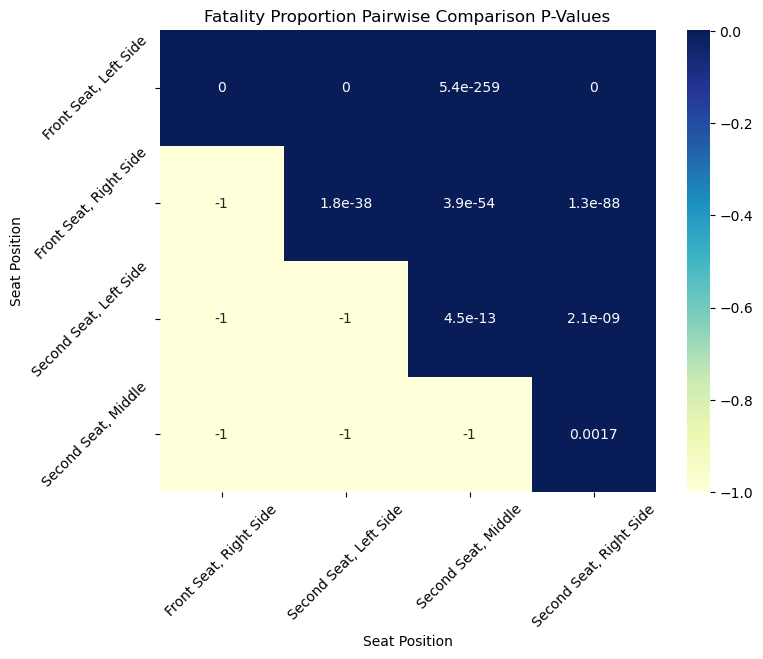

In [15]:
from statsmodels.stats.proportion import proportions_ztest
#seat_labels
seat_labels = df_seat_pos["Seat Pos"].unique()
seat_labels.sort()

#get the counts of fatal and non fatal for each seat position
y_data = {
    "Fatal": [len(df_seat_pos[(df_seat_pos["Seat Pos"] == pos) & (df_seat_pos["Is Fatal"] == True)]) for pos in seat_labels],
    "Non-Fatal": [len(df_seat_pos[(df_seat_pos["Seat Pos"] == pos) & (df_seat_pos["Is Fatal"] == False)]) for pos in seat_labels]
}

fatal_data = y_data["Fatal"]
non_fatal_data = y_data["Non-Fatal"]

row_comparisons = []
for i in range(len(fatal_data) - 1):
    comparisons = [-1 for i in range(len(fatal_data) - 1)]
    for j in range(i + 1, len(fatal_data)):

        # counts of 'success' for first seat position
        nob1 = fatal_data[i] + non_fatal_data[i]
        p1_counts = fatal_data[i]

        # counts of 'success' for second seat position
        nob2 = fatal_data[j] + non_fatal_data[j]
        p2_counts = fatal_data[j]

        # combined the successes in the seat positions
        nobs = np.asarray([nob1, nob2])
        counts = np.asarray([p1_counts, p2_counts])

        # perform 2 proportion z test
        stat, pval = proportions_ztest(counts, nobs)

        # store the pvalue in the array
        comparisons[j - 1] = pval
    
    row_comparisons.append(comparisons)

fig = plt.figure(figsize= (8, 6))

sns.heatmap(row_comparisons, annot = True, cmap="YlGnBu")
plt.title("Fatality Proportion Pairwise Comparison P-Values")
plt.xlabel("Seat Position")
plt.xticks([x+.5 for x in range(4)], seat_labels[1:], rotation = 45)
plt.ylabel("Seat Position")
plt.yticks([x + .5 for x in range(4)], seat_labels[:-1], rotation = 45)
plt.show()




<h1>3. General Fatality Trends</h1>

1a. Fatal cases over time.

In [16]:
# Displaying some Crash List Data
df_crash_list = pd.read_csv("../Resources/CrashList.csv",index_col=0)

# some data are from 2017, so we need to remove it 
df_crash_list = df_crash_list[df_crash_list["CrashDate"].apply(lambda x : datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%Y")) != "2017"]
df_crash_list.head()

,CountyName,CrashDate,Fatals,Peds,Persons,St_Case,State,StateName,TotalVehicles
10,DUVAL (31),2018-01-01 00:00:00,1,0,5,120018,12,Florida,2
11,PALM BEACH (99),2018-01-01 00:05:00,1,0,5,120396,12,Florida,3
12,SAN BERNARDINO (71),2018-01-01 00:11:00,1,1,1,60063,6,California,1
13,BRUNSWICK (19),2018-01-01 00:12:00,1,1,2,370003,37,North Carolina,1
14,CLINTON (49),2018-01-01 00:15:00,1,0,1,290001,29,Missouri,1


In [17]:
#dates and fatals
dates_fatals = df_crash_list[["CrashDate", "Fatals"]].copy()
dates_fatals["CrashDate"] = dates_fatals["CrashDate"].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime("%Y-%m"))

#group by dates and sum fatalities
grouped_date_fatals = dates_fatals.groupby("CrashDate").sum()

grouped_date_fatals.head()



,Fatals
CrashDate,
2018-01,2666
2018-02,2378
2018-03,2675
2018-04,2639
2018-05,3041


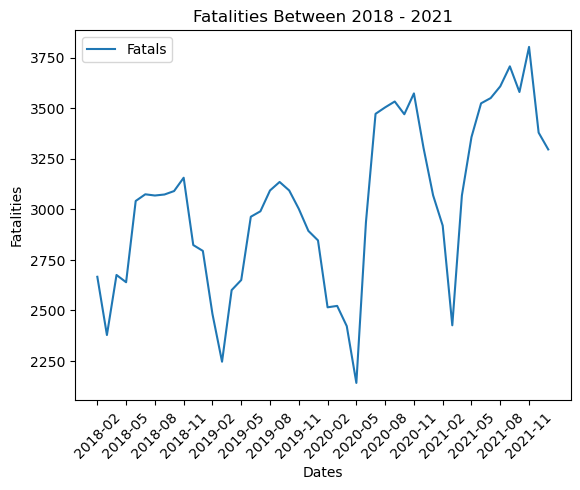

In [18]:
dates = grouped_date_fatals.index
fatalities = grouped_date_fatals["Fatals"]

# plot fatal cases over time
grouped_date_fatals.plot()
plt.title("Fatalities Between 2018 - 2021")
plt.ylabel("Fatalities")
plt.xlabel("Dates")
plt.xticks([i * 3 for i in range(len(dates)//3)], dates[1::3], rotation = 45)
plt.show()

<h4>3b. Fatality Trends Across the Entire US </h4>

In [23]:
# Load the County_State_Fatalities csv with lat and lon
df_fatalities_by_loc = pd.read_csv("../Resources/County_State_Fatalities_18-19.csv", index_col= 0)
df_fatalities_by_loc.head()


,CountyName,StateName,Fatals,lat,long
0,ABBEVILLE,South Carolina,13,34.177949,-82.379246
1,ACADIA,Louisiana,62,29.768820,-90.801481
2,ADA,Idaho,87,43.413654,-116.236742
3,ADAIR,Iowa,16,41.500442,-94.643579
4,ADAIR,Kentucky,13,37.950610,-86.826657


In [33]:
# remove not a number values
df_fatalities_by_loc = df_fatalities_by_loc.dropna()
df_fatalities_by_loc = df_fatalities_by_loc.reset_index(drop = True)

# Make sure all data are in the continental US.
df_fatalities_continental_US = df_fatalities_by_loc[(df_fatalities_by_loc["lat"] >= 24.396308) &
                                                     (df_fatalities_by_loc["lat"] <= 49.384358 ) &
                                                     (df_fatalities_by_loc["long"] >= -125.0 ) &
                                                     (df_fatalities_by_loc["long"] <= -66.93457) 
                                                    ]


plot = df_fatalities_continental_US.hvplot.points(
    "long",
    "lat",
    geo = True,
    tiles = "OSM",
    size = "Fatals",
    color = "StateName",
    alpha = .5
)

plot


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [long,lat]   (StateName,Fatals)